## Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.
2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)
6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

#from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE 

from sklearn.metrics import mean_squared_error
import os

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])


In [3]:
data = data.resample('d').mean()

In [4]:
data = data.resample('w').agg({'PJME_MW':'mean', 'year':'max', 'month':'max', 'quarter':'max', 'weekofyear':'max', 'is_holiday':'sum', \
                               'is_prev_holiday':'sum', 'is_next_holiday':'sum'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2002-01-06 to 2018-08-05
Freq: W-SUN
Data columns (total 8 columns):
PJME_MW            866 non-null float64
year               866 non-null float64
month              866 non-null float64
quarter            866 non-null float64
weekofyear         866 non-null float64
is_holiday         866 non-null float64
is_prev_holiday    866 non-null float64
is_next_holiday    866 non-null float64
dtypes: float64(8)
memory usage: 100.9 KB


In [6]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### Добавление признаков

In [7]:
def make_diff(df, src_name, n, trg_name):
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[n:] - df[src_name].values[n-1:-1]
    

In [8]:
def add_shifted(df, src_name, n, pref):
    trg_name = f'{pref}_{n}'
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[:-n]

In [9]:
#data = data.drop(columns=['t_1', 't_2'])

In [10]:
make_diff(data, 'PJME_MW', 1, 'diff1')
make_diff(data, 'diff1', 2, 'diff2')

In [11]:
%%time
p = 52
for i in range(p):
    add_shifted(data, 'PJME_MW', i+1, 't')
for i in range(p):
    add_shifted(data, 'diff1', i+1, 'd1')
for i in range(p):
    add_shifted(data, 'diff2', i+1, 'd2')

Wall time: 94.7 ms


In [12]:
data.to_csv('qq.csv', sep=';', encoding='cp1251')

### Селекция

In [13]:
scl_target=StandardScaler() 

h=4
target = data['PJME_MW'].values[p+h:].reshape((data.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(810, 1)

In [14]:
scl_x=StandardScaler() 

X_data = data.iloc[p:-h,:].values
X = scl_x.fit_transform(X_data.astype('float64'))
X.shape

(810, 166)

In [15]:
#X_data[:,0]

In [16]:
#target

In [17]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, q = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f}, I={}".format(f_test[i], i))

F-test=0.23, I=0
F-test=0.01, I=1
F-test=0.01, I=2
F-test=0.01, I=3
F-test=0.00, I=4
F-test=0.01, I=5
F-test=0.01, I=6
F-test=0.01, I=7
F-test=0.04, I=8
F-test=0.00, I=9
F-test=0.10, I=10
F-test=0.02, I=11
F-test=0.00, I=12
F-test=0.02, I=13
F-test=0.09, I=14
F-test=0.19, I=15
F-test=0.30, I=16
F-test=0.41, I=17
F-test=0.44, I=18
F-test=0.40, I=19
F-test=0.32, I=20
F-test=0.21, I=21
F-test=0.12, I=22
F-test=0.05, I=23
F-test=0.01, I=24
F-test=0.00, I=25
F-test=0.03, I=26
F-test=0.08, I=27
F-test=0.17, I=28
F-test=0.28, I=29
F-test=0.38, I=30
F-test=0.41, I=31
F-test=0.38, I=32
F-test=0.29, I=33
F-test=0.20, I=34
F-test=0.10, I=35
F-test=0.04, I=36
F-test=0.00, I=37
F-test=0.01, I=38
F-test=0.05, I=39
F-test=0.12, I=40
F-test=0.22, I=41
F-test=0.37, I=42
F-test=0.48, I=43
F-test=0.51, I=44
F-test=0.42, I=45
F-test=0.35, I=46
F-test=0.22, I=47
F-test=0.12, I=48
F-test=0.04, I=49
F-test=0.00, I=50
F-test=0.01, I=51
F-test=0.07, I=52
F-test=0.18, I=53
F-test=0.35, I=54
F-test=0.56, I=55
F-

In [18]:
data.columns[113] #113

'd1_52'

#### => вторые разности не дают корреляции, влияние календарных фич также исчезающе мало

уберем их

In [19]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

In [20]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(810, 5)

In [21]:
column_names = data.columns[sfk.get_support()]
column_names

Index(['t_46', 't_47', 't_48', 't_49', 't_50'], dtype='object')

In [22]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(810, 17)

In [23]:
column_namesp = data.columns[sfp.get_support()]
column_namesp

Index(['t_8', 't_9', 't_10', 't_21', 't_22', 't_23', 't_33', 't_34', 't_35',
       't_36', 't_37', 't_45', 't_46', 't_47', 't_48', 't_49', 't_50'],
      dtype='object')

In [24]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(810, 5)

In [25]:
column_namesf = data.columns[sfm.get_support()]
column_namesf

Index(['t_22', 't_23', 't_34', 't_48', 't_49'], dtype='object')

In [26]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [55 56 57 58 59]
Номера признаков лучших признаков по процентной форме:  [17 18 19 30 31 32 42 43 44 45 46 54 55 56 57 58 59]
Номера признаков для выбора по модели :  [31 32 43 57 58]


In [27]:
list_param_p

array([17, 18, 19, 30, 31, 32, 42, 43, 44, 45, 46, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [28]:
list_par=[16, 17, 18, 29, 30, 31, 41, 42, 43, 44, 45, 53, 54, 55, 56, 57, 58]
#[7, 9, 10, 19, 20, 21, 32, 33, 34, 44, 45, 46, 47, 48, 57, 58, 59, 60]
X_new = X[:,list_par]
data.drop(columns=['PJME_MW']).columns[list_par]

Index(['t_8', 't_9', 't_10', 't_21', 't_22', 't_23', 't_33', 't_34', 't_35',
       't_36', 't_37', 't_45', 't_46', 't_47', 't_48', 't_49', 't_50'],
      dtype='object')

###  Будем использовать 113 фич после отсева вторых разностей 

In [29]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [30]:
train, test = split_data( data, '06-01-2015')

In [31]:
test.shape, train.shape

((166, 166), (700, 166))

In [32]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [33]:
def do_gb_predict(df, h):
    if not h>0:
        print('the predict does not allow data leakage')
        return 1
    
    target = data['PJME_MW'].values[p+h:].reshape((data.shape[0]-h-p,1))
    y = target  #scl_target.fit_transform(target)
    
    X_data = data.iloc[p:-h,:113].values
    X = X_data #scl_x.fit_transform(X_data.astype('float64'))
    
    X_train =X[:train.shape[0],:]
    y_train =y[:train.shape[0]].ravel()
    X_test =X[train.shape[0]:,:]
    y_test =y[train.shape[0]:].ravel()
    
    model_g.fit( X_train, y_train )
    
    y_pred = model_g.predict(X_test)
    
    return y_test, y_pred

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
h = 1
y, y_pred = do_gb_predict(data, h)

In [36]:
y_pred.shape

(113,)

D:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


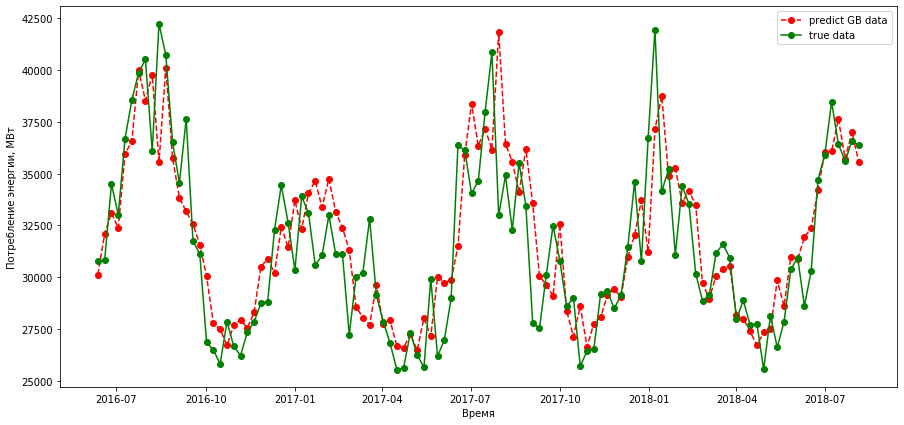

In [37]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[p+h:], y_pred, '--or', label='predict GB data' )
plt.plot(test.index[p+h:], y, '-og', label='true data')

plt.legend()
plt.show()

In [38]:
er_g = mean_absolute_percentage_error(y,y_pred )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   5.737882996415764 %


In [39]:
h = 4
y, y_pred = do_gb_predict(data, h)

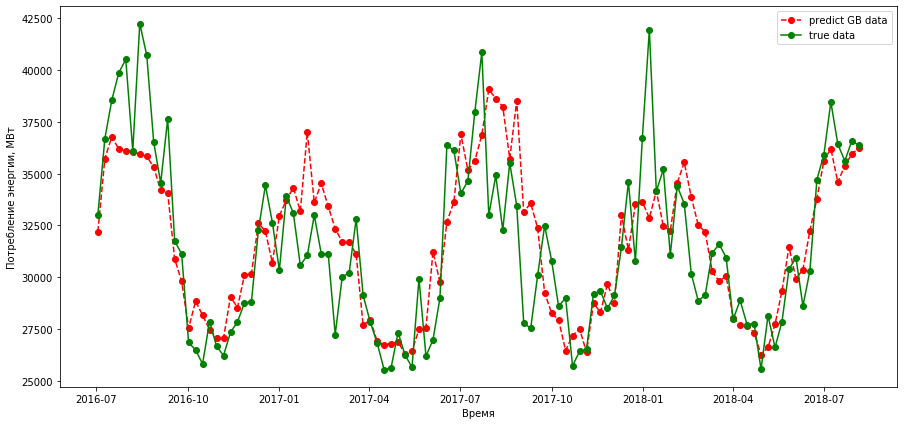

In [40]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[p+h:], y_pred, '--or', label='predict GB data' )
plt.plot(test.index[p+h:], y, '-og', label='true data')

plt.legend()
plt.show()

In [41]:
er_g = mean_absolute_percentage_error(y,y_pred )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.053339138392843 %


### Обучим модель для прогноза на один шаг

In [42]:
def do_gb_fit(df, h):
    '''
    Переносит сплит из исходного датасета в массивы, обучает модель на train
    возвращает обученную модель и y_test, X_test для дальнейшей работы с ними
    '''
    if not h>0:
        print('the predict does not allow data leakage')
        return 1
    
    target = data['PJME_MW'].values[p+h:].reshape((data.shape[0]-h-p,1))
    y = target #scl_target.fit_transform(target)
    
    X_data = data.iloc[p:-h,:114].values
    X = X_data #scl_x.fit_transform(X_data.astype('float64'))
    
    X_train =X[:train.shape[0],:]
    y_train =y[:train.shape[0]].ravel()
    X_test =X[train.shape[0]:,:]
    y_test =y[train.shape[0]:].ravel()
    
    model_g.fit( X_train, y_train )
    
    return model_g, y_test, X_test

In [43]:
model_g, y_test, X_test = do_gb_fit(data, 1)

### Вычислим скользящий прогноз на 4 шага, используя обученную модель

In [44]:
tn = np.r_[0, 10:62] # индексы сдвигов

In [45]:
dn = np.r_[62:114] # индексы разностей

In [46]:
np.max((1,2))

2

In [47]:
def predict_change_feats(p, i, y, X):
    '''
    Делает предикт в точке X[p] на i шагов вперед, заменяя сдвиги и разности по мере увеличения i
    '''
    y[p+i] = model_g.predict(X[p+i].reshape(1, -1))
    
    # change X:
    j = np.min((i, 53))
    if i>0:
        X[p+i+1, tn[0]] = y[p+i-1]
        
    if i>1:
        X[p+i+1, 62] = X[p+i, tn[0]] - X[p+i, tn[1]]
    
    for k in range(j-1):
        X[p+i+1, tn[k+1]] = X[p+i, tn[k]]
        
    for k in range(j-2):
        X[p+i+1, dn[k+1]] = X[p+i, dn[k]]
    
    return y, X

In [48]:
y_pred4slide = []
for p in range(100):
    
    y_slide = y_test.copy()
    X_slide = X_test.copy()
    
    for i in range(4):
        y_slide, X_slide = predict_change_feats(p, i, y_slide, X_slide)
        
    y_pred4slide.append(y_slide[p+3])

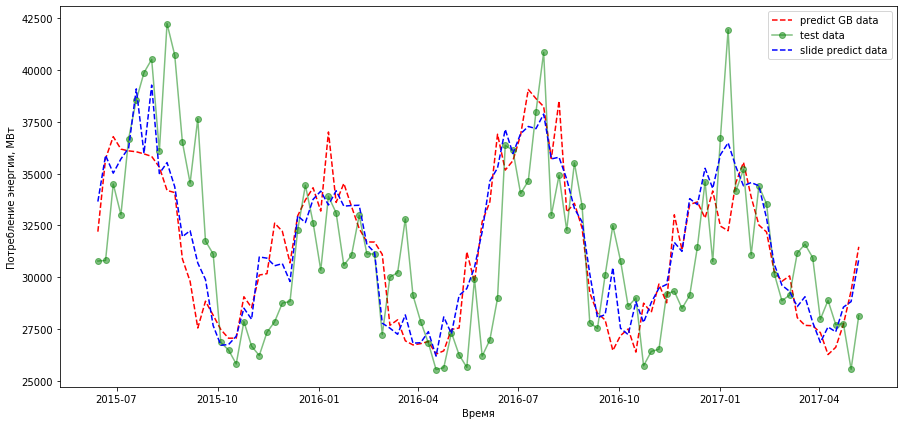

In [49]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:101],y_pred[:100], '--r',label='predict GB data' )
plt.plot(test.index[1:101],y_test[:100], '-og',label='test data', alpha=0.5)
plt.plot(test.index[1:101],y_pred4slide[:100], '--b',label='slide predict data')

plt.legend()
plt.show()  
    

In [50]:
er_g = mean_absolute_percentage_error(y_test[:100],y_pred4slide )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.910337999624602 %


In [51]:
X_slide.shape

(113, 114)

### Запустим скользящий прогноз на 100 точек

In [52]:
y_slide = y_test.copy()
X_slide = X_test.copy()
    
for i in range(100):
    y_slide, X_slide = predict_change_feats(0, i, y_slide, X_slide)

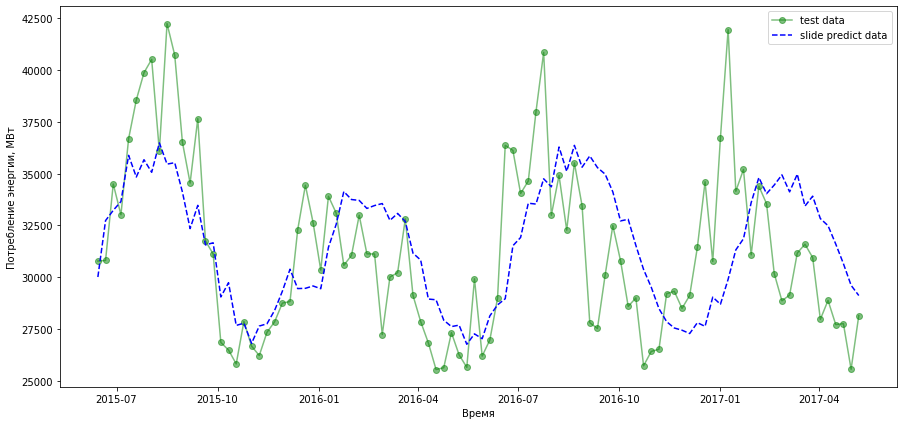

In [53]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:101],y_test[:100], '-og',label='test data', alpha=0.5)
plt.plot(test.index[1:101],y_slide[:100], '--b',label='slide predict data')

plt.legend()
plt.show() 

In [54]:
er_g = mean_absolute_percentage_error(y_test[:100],y_slide[:100] )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.806509522880225 %


In [55]:
x = pd.DataFrame(abs(y_test[:100] - y_slide[:100]))
x['by'] = x.index // 10
xx = x.groupby('by').mean()

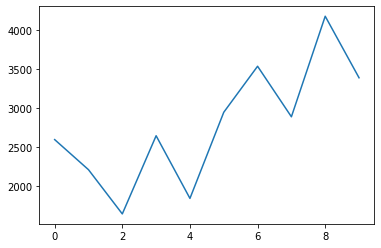

In [56]:
plt.plot(xx)
plt.show()

### Абсолютное значение ошибки прогноза увеличивается по мере увеличения сдвига. Также ощутимо увеличение запаздывания скользящуго прогноза